In [4]:
from parse_perfetto import plot_tflops_grouped_by_operation

In [5]:
from parse_perfetto import *

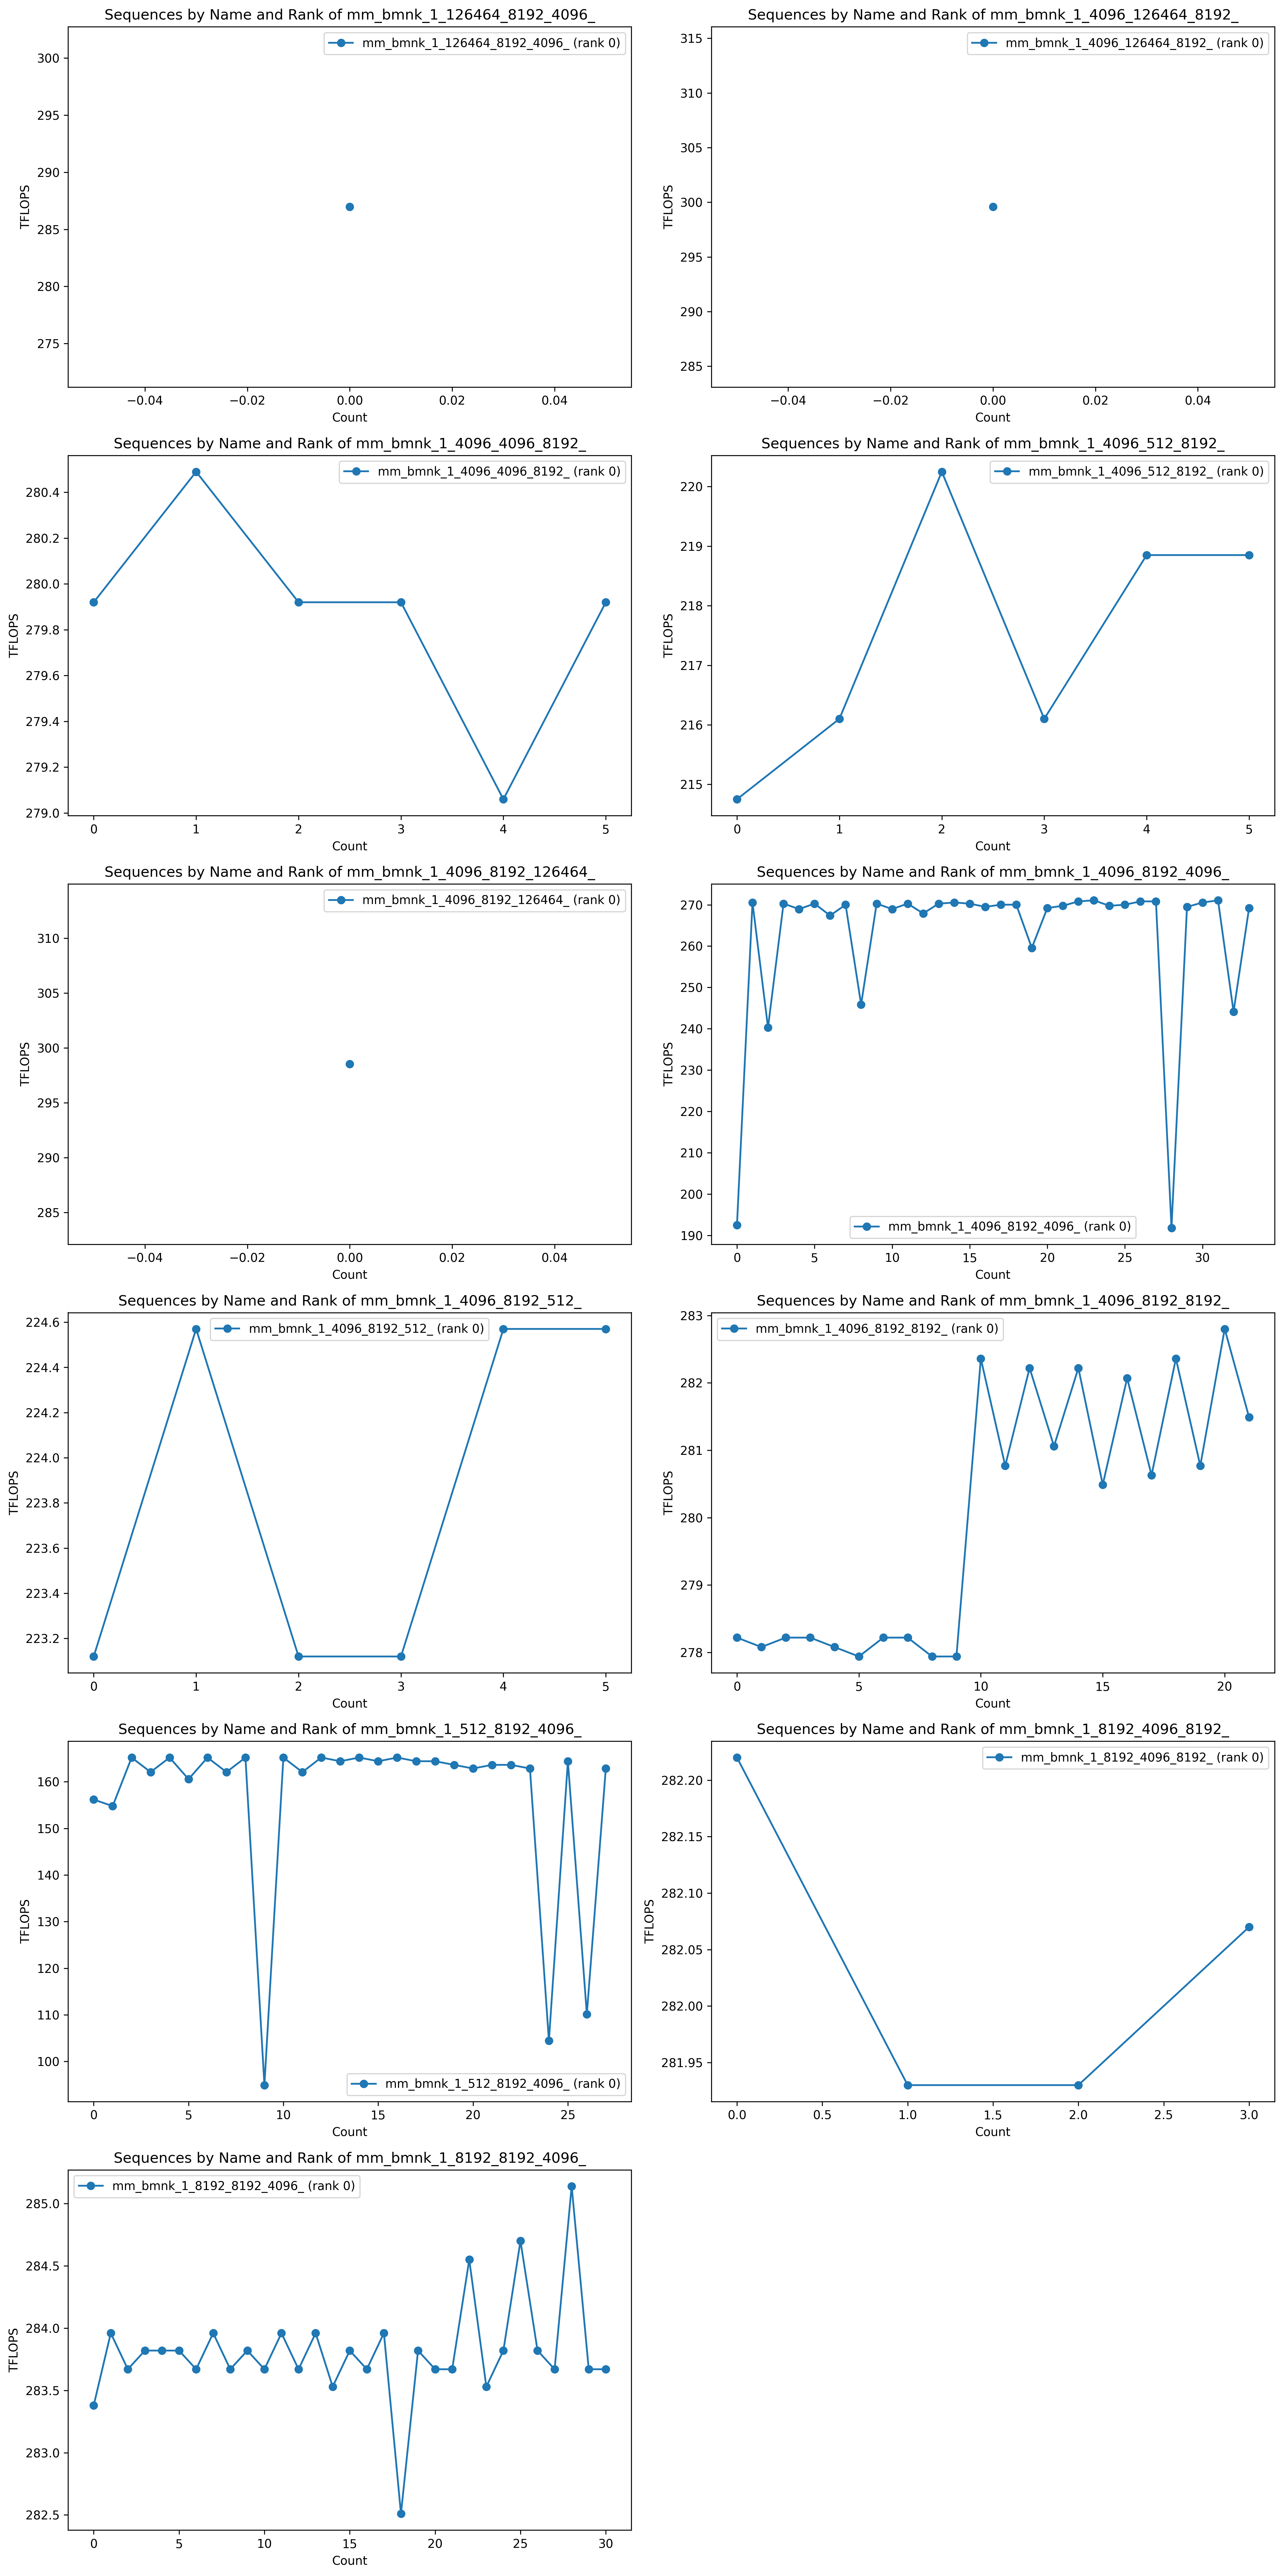

In [6]:
timeline_path = "/Users/sangbo/local_data/projects/xpu_timer/paper/experiments/figs/trace_dp4.bin"
save_image = "./fsdp.svg"
plot_tflops_grouped_by_operation(timeline_path, save_image)

In [7]:
timeline_path = "/Users/sangbo/local_data/projects/xpu_timer/paper/experiments/figs/trace_dp4.bin"
trace = PerfettoParser(trace=timeline_path)
filter_rank =[ i for i in range(8)]
matmul = trace.parse(tflops_sql)
# Loop over each name and rank to plot them separately
matmul = matmul[matmul['rank'].isin(filter_rank)]
grouped = matmul.groupby(['name', 'rank'])


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False
def plot_sss(data):
    if(len(data) < 10):
        return
    y = np.array(data)
    x = np.arange(1, (len(y)+1))

    z1=np.polyfit(x,y,deg=1)#deg=100,100次多项式，返回值为系数
    p1=np.poly1d(z1)#通过多项式系数，返回方程
    print(p1)#输出方程
    print(np.polyval(p1,12))#进行预测
    print(np.polyval(z1,13))#这两种方法都可以，可以p1，或者z1作为参数，12，13为x，输入x得到预测值

    y_pred=p1(x)#预测值
    plt.plot(x,y,'*',label='origin value')
    plt.plot(x,y_pred,'r',label='pred value')
#     plt.title('多项式拟合')
    plt.xlabel('xlable')
    plt.ylabel('ylabel')
    plt.legend(loc=3, borderaxespad=0., bbox_to_anchor=(0, 0))#画出图例
    plt.show()

===============mm_bmnk_1_126464_8192_4096_------------0====================
[]
===============mm_bmnk_1_126464_8192_4096_------------1====================
[]
===============mm_bmnk_1_126464_8192_4096_------------2====================
===============mm_bmnk_1_126464_8192_4096_------------3====================
===============mm_bmnk_1_4096_126464_8192_------------0====================
[]
===============mm_bmnk_1_4096_126464_8192_------------1====================
[]
===============mm_bmnk_1_4096_126464_8192_------------2====================
===============mm_bmnk_1_4096_126464_8192_------------3====================
===============mm_bmnk_1_4096_4096_8192_------------0====================
[]
===============mm_bmnk_1_4096_4096_8192_------------1====================
[]
===============mm_bmnk_1_4096_4096_8192_------------2====================
===============mm_bmnk_1_4096_4096_8192_------------3====================
===============mm_bmnk_1_4096_512_8192_------------0====================
[]
==

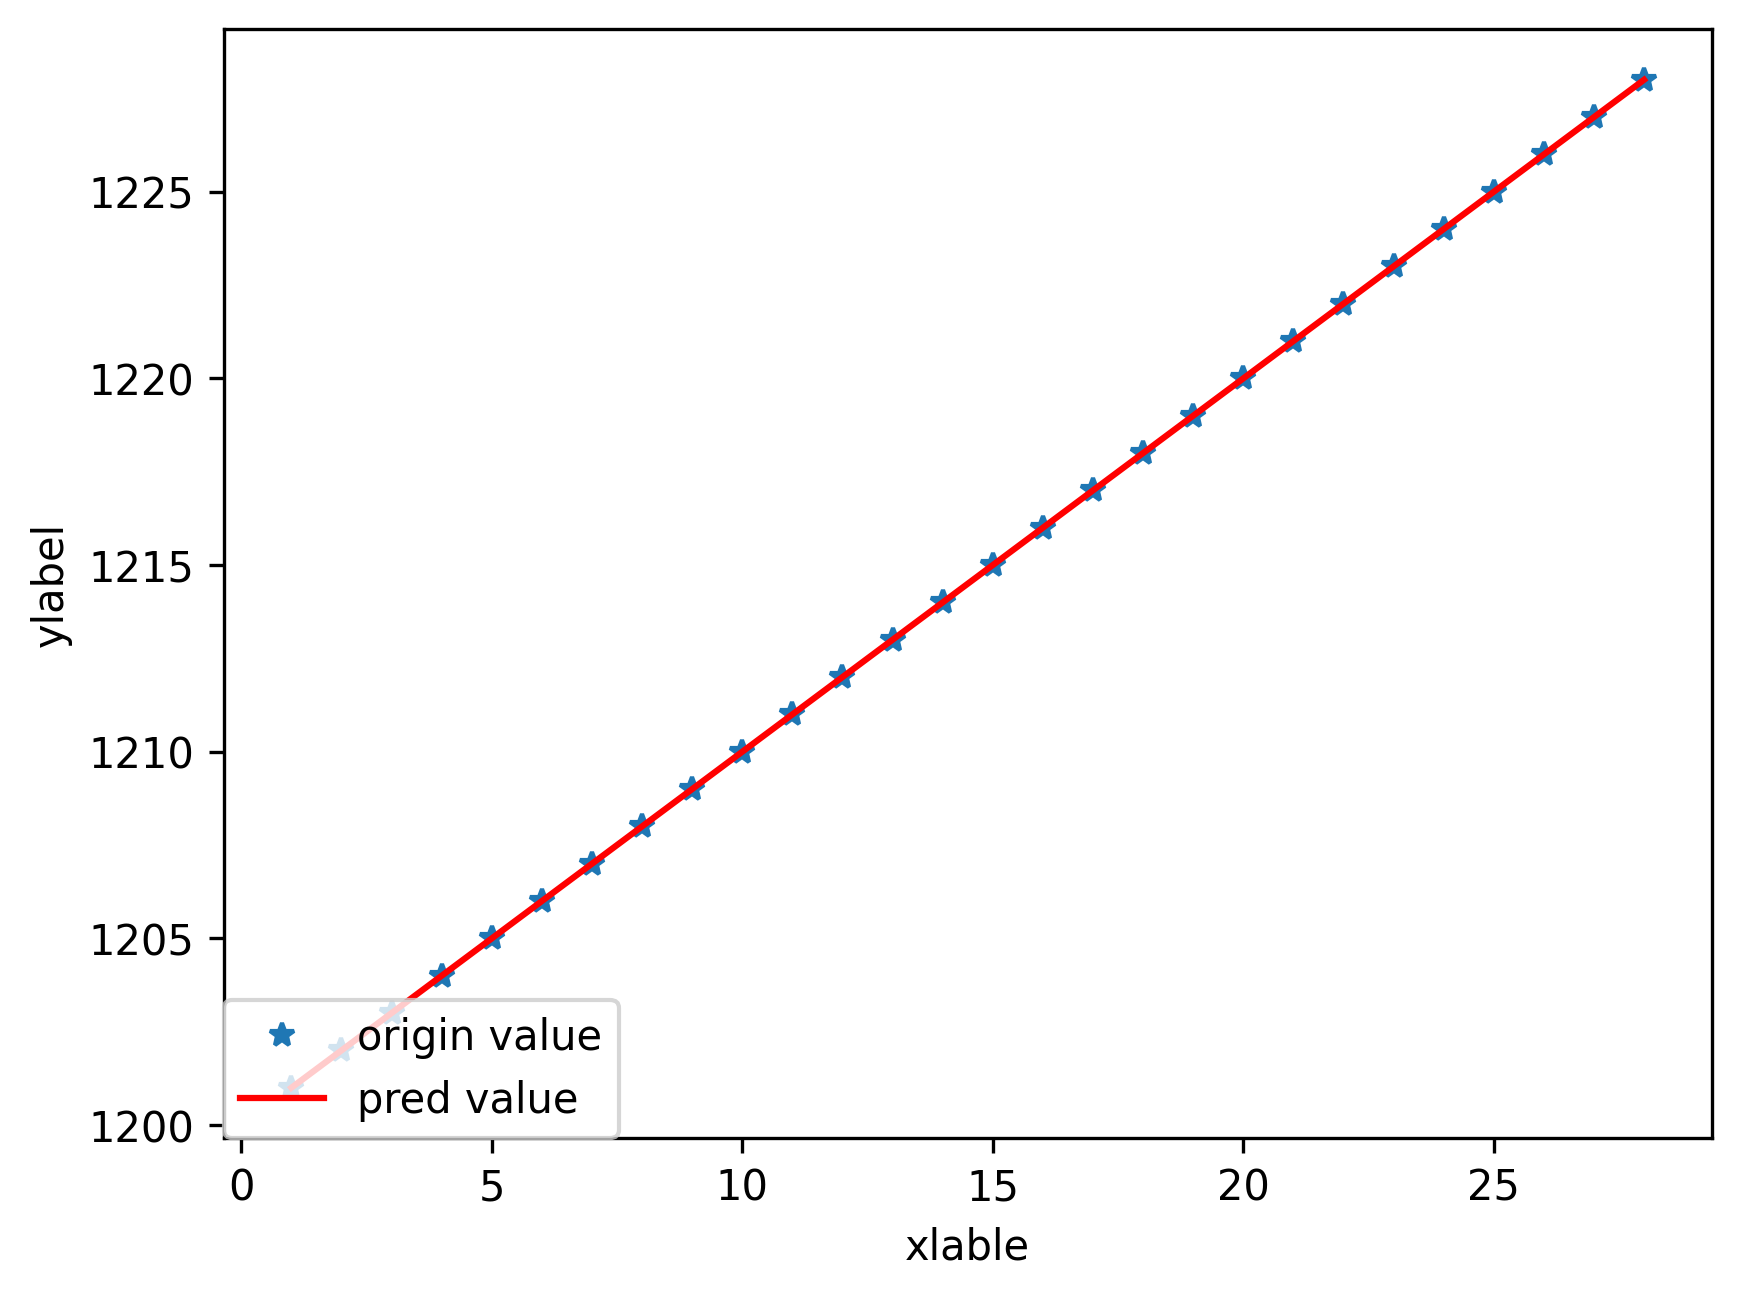

[1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228]
===============mm_bmnk_1_512_8192_4096_------------1====================
 
1 x + 1200
1212.0
1213.0


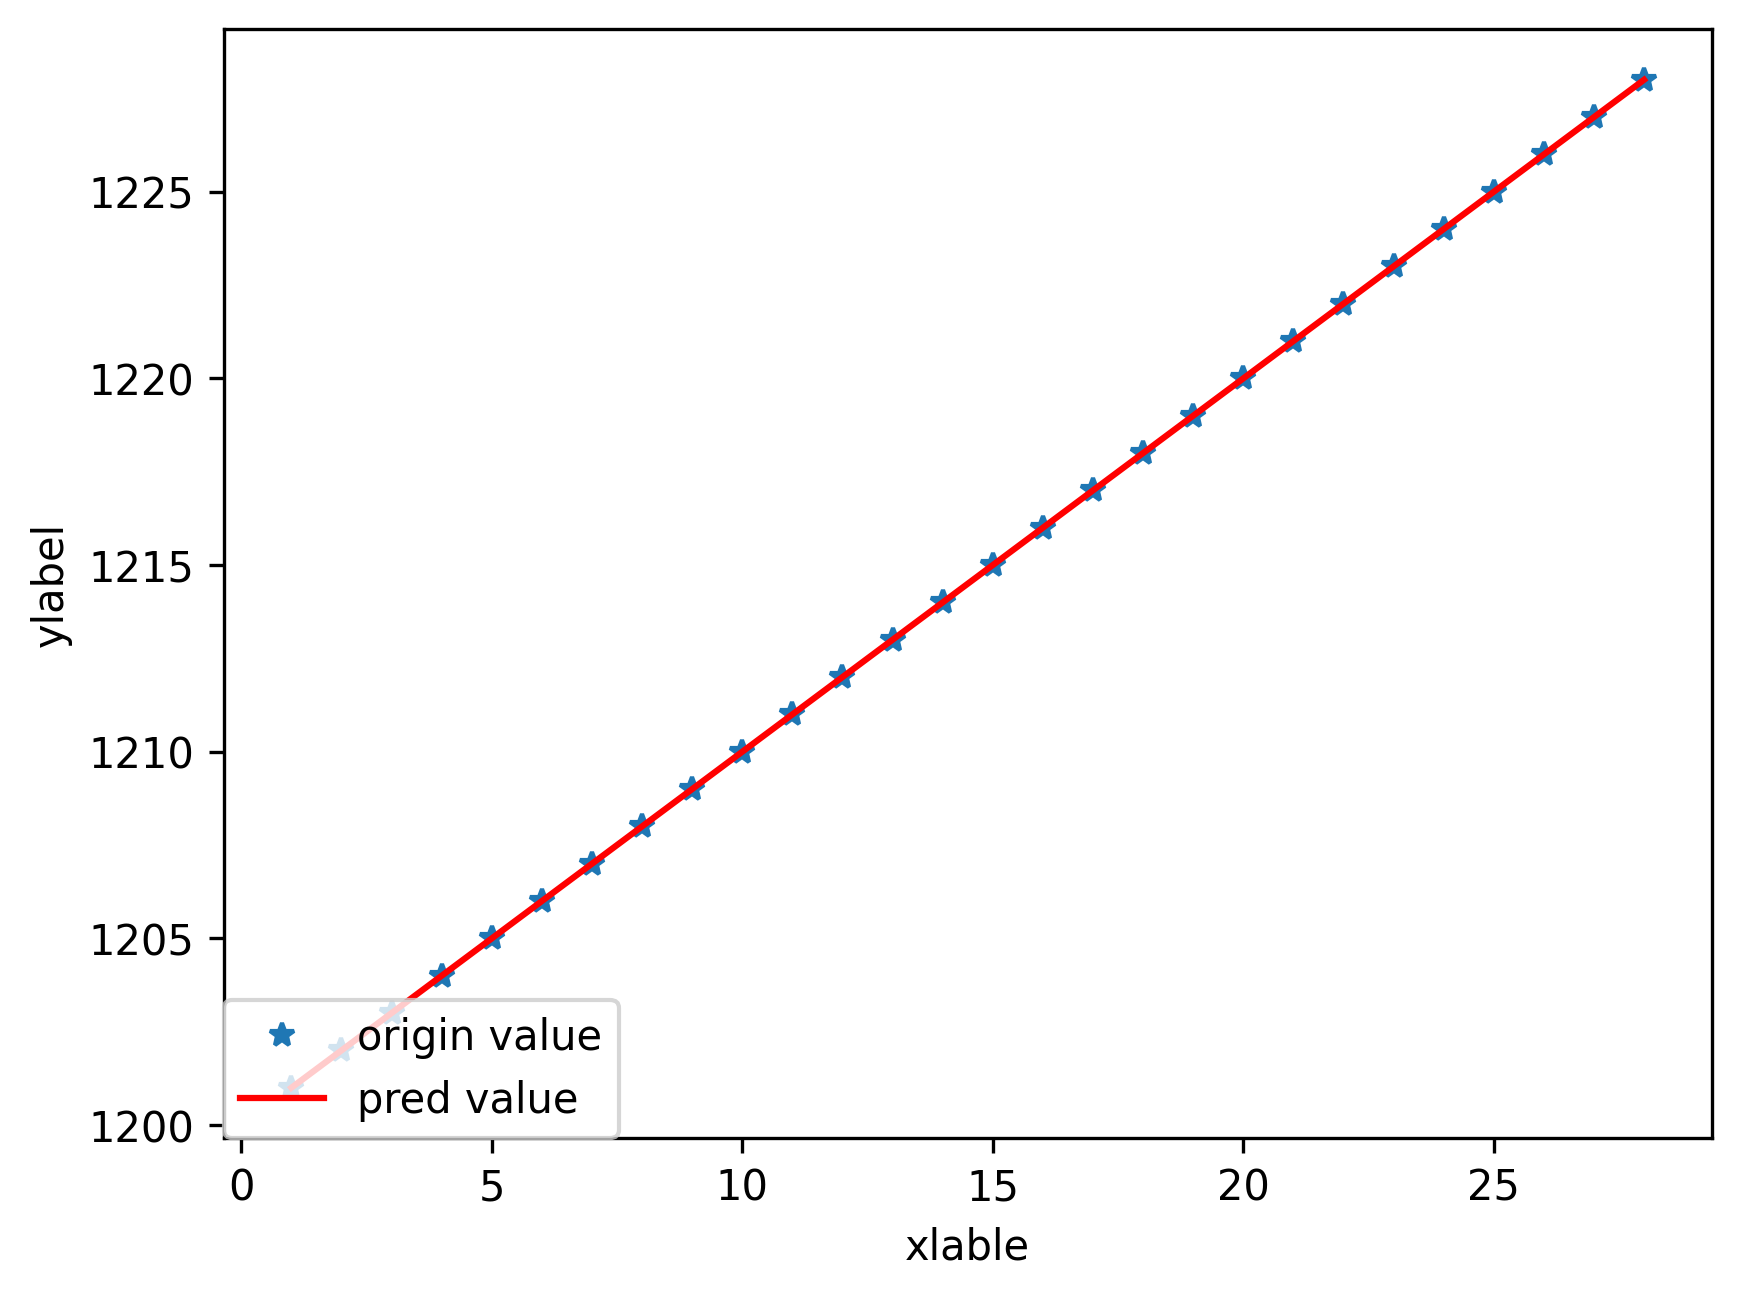

[1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228]
===============mm_bmnk_1_512_8192_4096_------------2====================
===============mm_bmnk_1_512_8192_4096_------------3====================
===============mm_bmnk_1_8192_4096_8192_------------0====================
[]
===============mm_bmnk_1_8192_4096_8192_------------1====================
[]
===============mm_bmnk_1_8192_4096_8192_------------2====================
===============mm_bmnk_1_8192_4096_8192_------------3====================
===============mm_bmnk_1_8192_8192_4096_------------0====================
[]
===============mm_bmnk_1_8192_8192_4096_------------1====================
[]
===============mm_bmnk_1_8192_8192_4096_------------2====================
===============mm_bmnk_1_8192_8192_4096_------------3====================


In [9]:
for (name, rank), df in grouped:
    print(f"==============={name}------------{rank}====================")
    filter_df = df[df['TFLOPS'] < 200]
    if rank in [0, 1, 7]:
        plot_sss(filter_df['count'].tolist())
        print(filter_df['count'].tolist())


In [10]:
xx = [6021, 6022, 6025, 6026, 6029, 6030, 6033, 6034, 6037, 6038, 6041, 6042, 6045, 6046, 6049, 6050, 6053, 6054, 6057, 6058, 6061, 6062]

In [11]:
len(xx)

22

In [12]:
yy = np.array(xx)
tt = yy[1:] - yy[0:-1]
tt

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1])

In [13]:
np.sum(tt == 3)

10

In [14]:
from parse_perfetto import analysis_host_issue

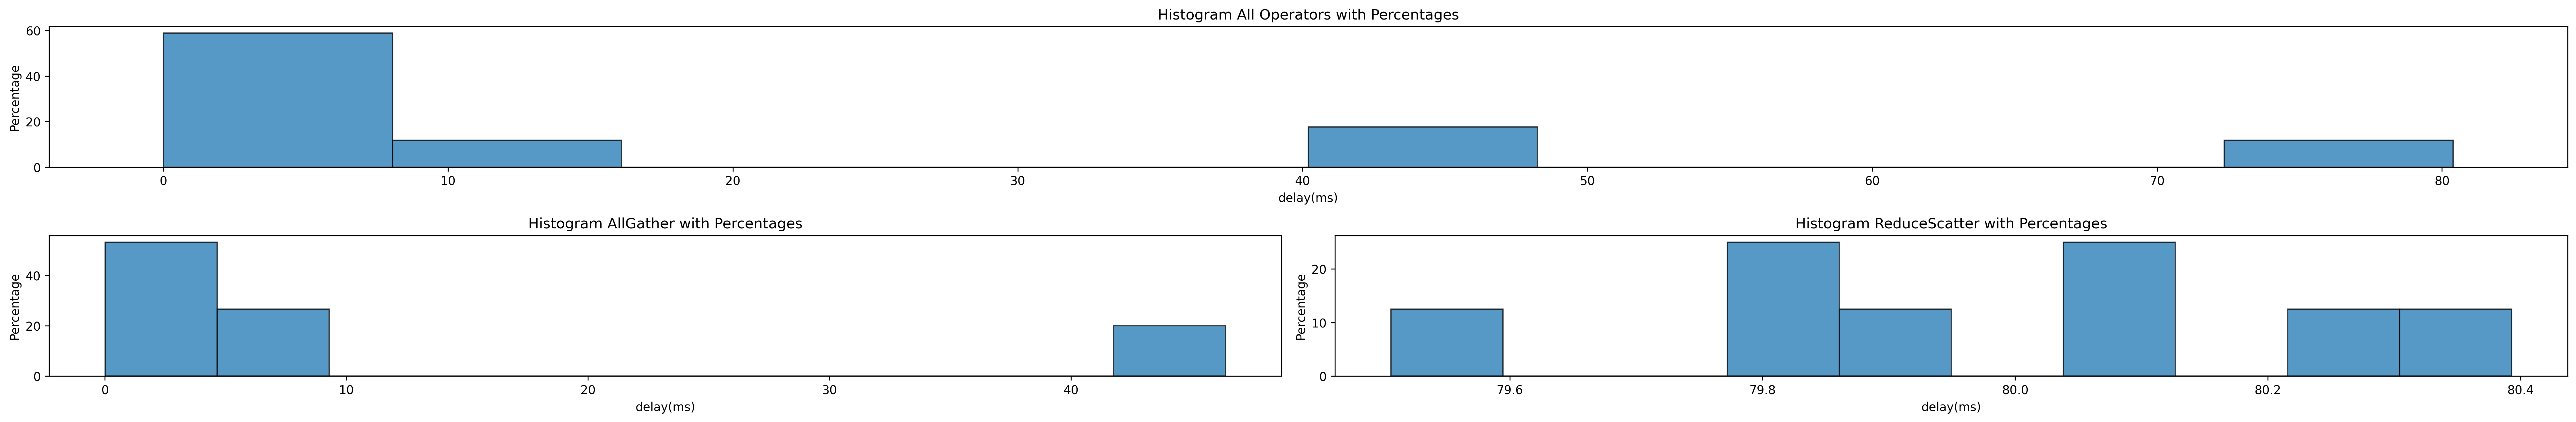

In [16]:
gc_timeline_path = "/Users/sangbo/local_data/projects/xpu_timer/paper/experiments/figs/trace_dp4.bin"
output_dir = "./bad_gc"
group_str = "tp2-cp1-dp32-pp4"


bad_gc = analysis_host_issue(gc_timeline_path, output_dir, group_str)

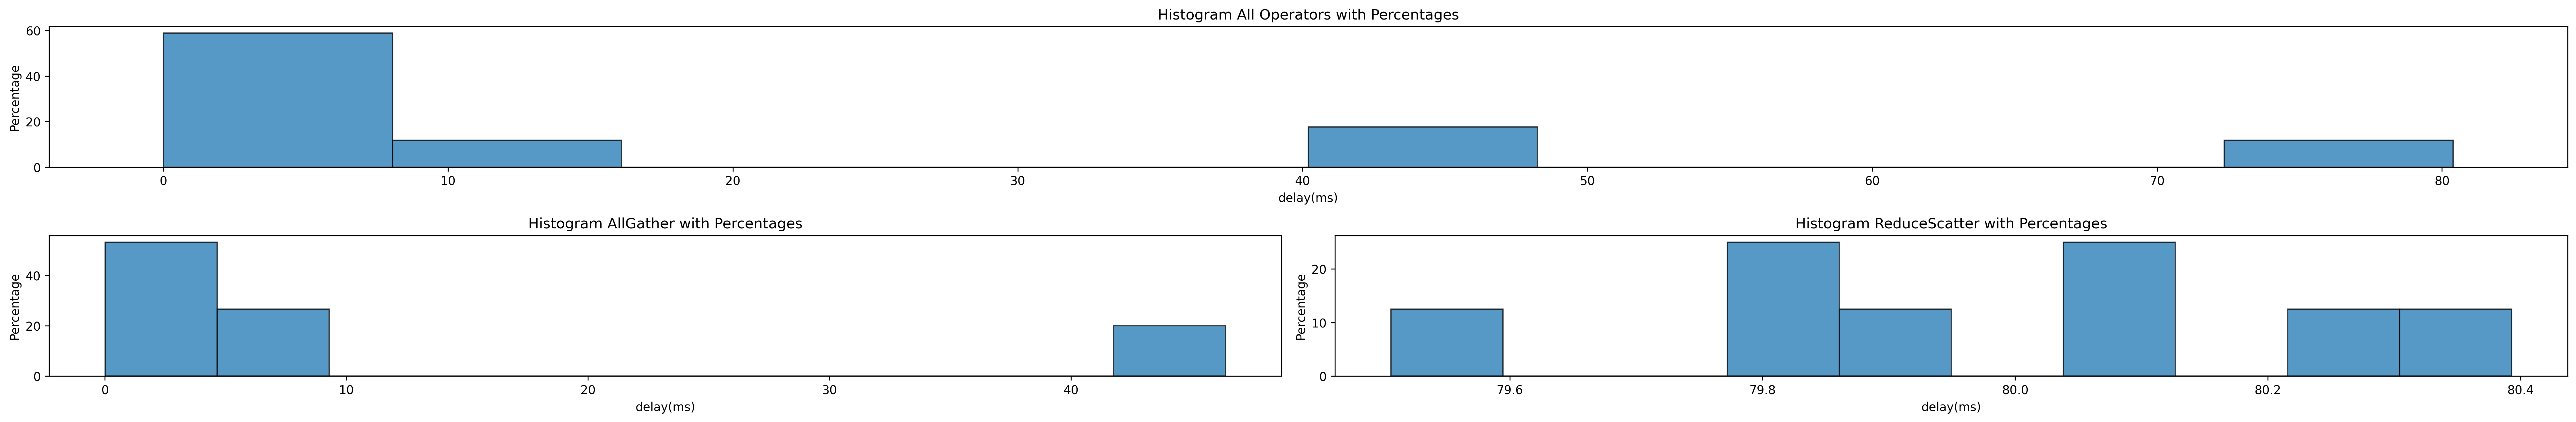

In [27]:
no_sync_timeline_path = "/Users/sangbo/local_data/projects/xpu_timer/paper/experiments/figs/trace_dp4.bin"
output_dir = "./no_sync"
group_str = "tp2-cp1-dp32-pp4"

no_sync = analysis_host_issue(no_sync_timeline_path, output_dir, group_str)

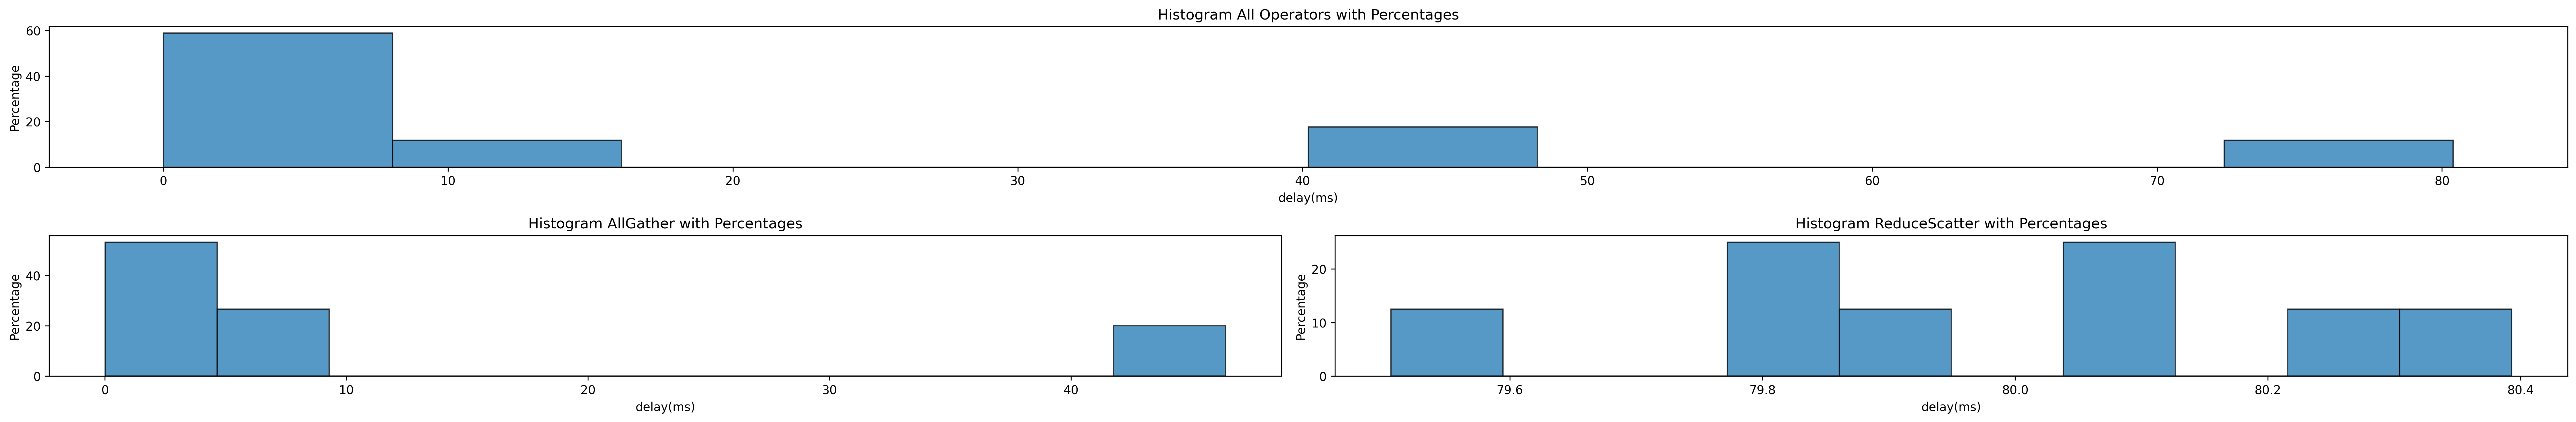

In [28]:
bad_sync_timeline_path = "/Users/sangbo/local_data/projects/xpu_timer/paper/experiments/figs/trace_dp4.bin"
output_dir = "./bad_sync"
group_str = "tp2-cp1-dp32-pp4"

bad_sync = analysis_host_issue(bad_sync_timeline_path, output_dir, group_str)

In [29]:
bad_gc.keys()

dict_keys(['AllGather', 'ReduceScatter'])

In [30]:
no_sync.keys()

dict_keys(['AllGather', 'ReduceScatter'])

In [31]:
bad_sync.keys()

dict_keys(['AllGather', 'ReduceScatter'])

In [32]:
# flake8: noqa: E402
import os
import random
from argparse import ArgumentParser
from collections import OrderedDict
from pathlib import Path
from typing import Dict

import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from perfetto.trace_processor import TraceProcessor
from util import GetRankHelper


In [33]:
dist_strategy = "tp2-cp1-dp32-pp4"
groups_dict = OrderedDict((pair[:2], int(pair[2:])) for pair in dist_strategy.split("-"))
rank_helper = GetRankHelper(groups_dict)
group_ranks = {group: rank_helper.get_ranks(group) for group in groups_dict}


In [34]:
ranks = []
ranks.extend(group_ranks['tp'][0])
ranks.extend(group_ranks['dp'][0])
ranks.extend(group_ranks['pp'][0])
ranks.sort()
ranks = set(ranks)
ranks

{0,
 1,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 128,
 192}

In [35]:
def plot_nccl_host_issue_delay_hist(dfs_list, labels, filter_ranks):

    unique_ops = dfs_list[0].keys()
    # Determine the number of subplots needed
    num_plots = len(unique_ops)
    num_cols = 2  # Define the number of columns in the subplot grid
    num_rows = (num_plots + num_cols - 1) // num_cols  + 1# Calculate the number of rows needed
    
    fig = plt.figure(figsize=(30, num_rows * 5))
    gs = fig.add_gridspec(num_rows,num_cols)
    axe = fig.add_subplot(gs[0, :])
    
    for i, dfs in enumerate(dfs_list):
        delay = []
        for k,v in dfs.items():
            v = v[v['rank'].isin(filter_ranks)]
            delay.extend(v['delay'].tolist())
        # Step 1: Sort the data
        sorted_delay = np.sort(delay)

        # Step 2: Calculate the CDF
        cdf_delay = np.arange(1, len(sorted_delay) + 1) / len(sorted_delay)

        # Step 3: Plot the CDF
        axe.plot(sorted_delay, cdf_delay, marker='.', linestyle='-', label=f'{labels[i]}')

    axe.set_xlabel('host issue (ms)')
    axe.set_ylabel('Ratio Comulative Distribution (%)')
    axe.set_title("CDF of Host Issue")
    axe.legend(loc=2)

    # Create histograms for each unique op
    for i, unique_op in enumerate(unique_ops):
        axe = fig.add_subplot(gs[(i+2)//2, (i+2)%2])
        
        for j, dfs in enumerate(dfs_list):
            delay = []
            for k,v in dfs.items():
                v = v[v['rank'].isin(filter_ranks)]
                v = v[v['op'] == unique_op]
                delay.extend(v['delay'].tolist())
            # Step 1: Sort the data
            sorted_delay = np.sort(delay)

            # Step 2: Calculate the CDF
            cdf_delay = np.arange(1, len(sorted_delay) + 1) / len(sorted_delay)

            # Step 3: Plot the CDF
            axe.plot(sorted_delay, cdf_delay, marker='.', linestyle='-', label=f'{labels[j]}')
        
        axe.set_xlabel('host issue (ms)')
        axe.set_ylabel('Ratio Comulative Distribution (%)')
        axe.set_title(f"CDF of {unique_op} Host Issue")
        axe.legend(loc=2)

        

    plt.tight_layout()
    plt.grid(True)
    plt.savefig("cdf_of_host_issue.svg", dpi=300)
    plt.show()

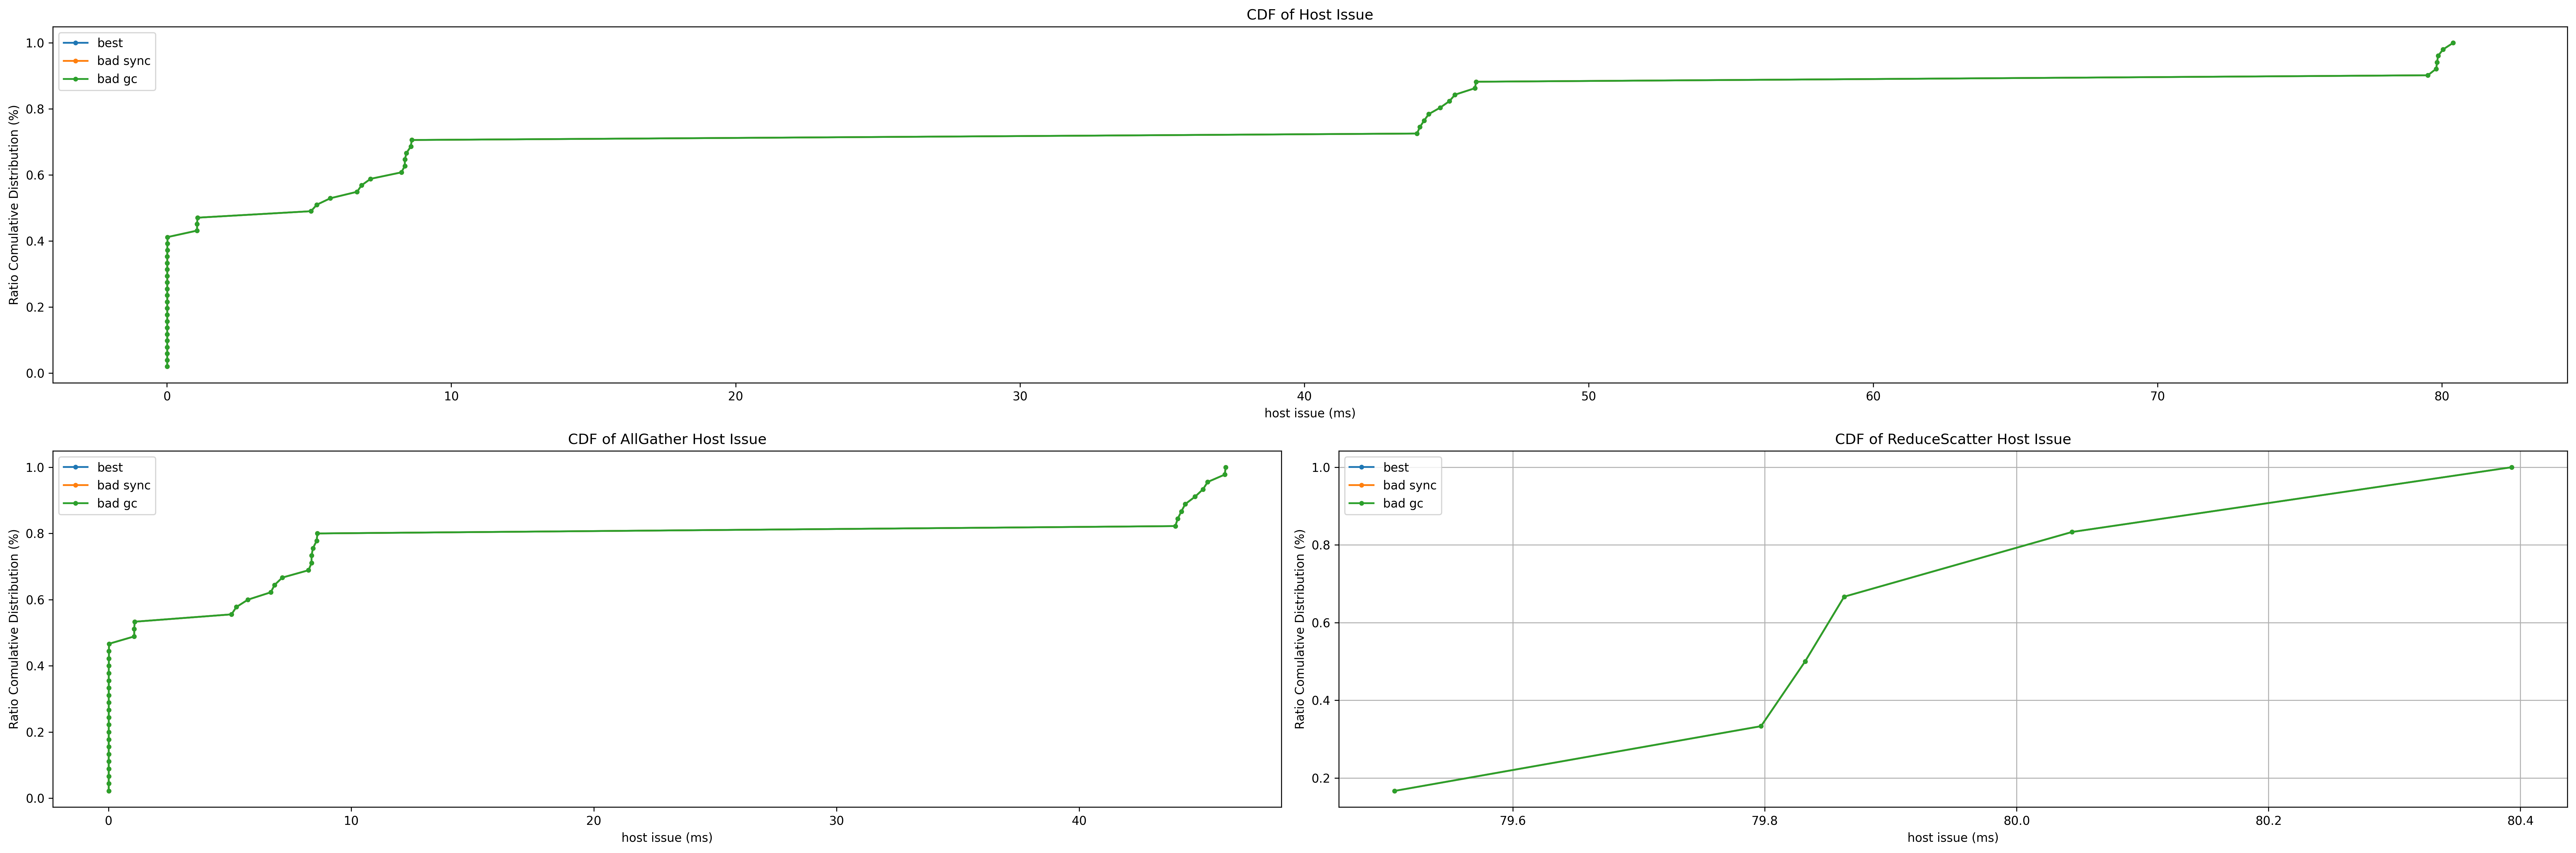

In [36]:
plot_nccl_host_issue_delay_hist([no_sync, bad_sync, bad_gc], labels = ["best", "bad sync", "bad gc"], filter_ranks=ranks)